In [1]:
import os

In [2]:
os.chdir("../core/")

In [3]:
%%capture
from load_datasets import *
from ensemble import *
from saliency import *
from scipy.stats import describe

In [4]:
(SVHN_trainX, SVHN_trainY),(SVHN_testX, SVHN_testY) = load_data("SVHN")
(MNIST_trainX, MNIST_trainY),(MNIST_testX, MNIST_testY) = load_data("MNIST")
NotMNIST = load_data("NotMNIST")
(CIFAR10_trainX, CIFAR10_trainY),(CIFAR10_testX, CIFAR10_testY) = load_data("CIFAR10")

../../datasets/notMNIST_small/A
Could not read: ../../datasets/notMNIST_small/A/RGVtb2NyYXRpY2FCb2xkT2xkc3R5bGUgQm9sZC50dGY=.png : Could not find a format to read the specified file in single-image mode - it's ok, skipping.
../../datasets/notMNIST_small/B
../../datasets/notMNIST_small/C
../../datasets/notMNIST_small/D
../../datasets/notMNIST_small/E
../../datasets/notMNIST_small/F
Could not read: ../../datasets/notMNIST_small/F/Q3Jvc3NvdmVyIEJvbGRPYmxpcXVlLnR0Zg==.png : Could not find a format to read the specified file in single-image mode - it's ok, skipping.
../../datasets/notMNIST_small/G
../../datasets/notMNIST_small/H
../../datasets/notMNIST_small/I
../../datasets/notMNIST_small/J


In [5]:
MNIST_trainX,MNIST_testX = pad_dataset(MNIST_trainX),pad_dataset(MNIST_testX)
NotMNIST = pad_dataset(NotMNIST)

# Creating ensemble

In [7]:
SVHN_lenet = get_lenet(input_shape = np.shape(SVHN_trainX[0]))
train_network(network = SVHN_lenet, trainX = SVHN_trainX, trainY = SVHN_trainY)
SVHN_lenets = clone_network_into_ensemble(number_of_networks = 5, network = SVHN_lenet)
train_ensemble(ensemble = SVHN_lenets, trainX = SVHN_trainX, trainY = SVHN_trainY)

Epoch 1/5
73257/73257 [==============================] - 15s 203us/step - loss: 1.9009 - acc: 0.3439
Epoch 2/5
73257/73257 [==============================] - 13s 180us/step - loss: 0.7254 - acc: 0.7889
Epoch 3/5
73257/73257 [==============================] - 13s 180us/step - loss: 0.5185 - acc: 0.8539
Epoch 4/5
73257/73257 [==============================] - 13s 181us/step - loss: 0.4418 - acc: 0.8762
Epoch 5/5
73257/73257 [==============================] - 13s 180us/step - loss: 0.3910 - acc: 0.8899
Epoch 1/5
73257/73257 [==============================] - 14s 193us/step - loss: 1.8127 - acc: 0.3789
Epoch 2/5
73257/73257 [==============================] - 13s 181us/step - loss: 0.6659 - acc: 0.8083
Epoch 3/5
73257/73257 [==============================] - 13s 179us/step - loss: 0.5082 - acc: 0.8572
Epoch 4/5
73257/73257 [==============================] - 13s 181us/step - loss: 0.4371 - acc: 0.8777
Epoch 5/5
73257/73257 [==============================] - 13s 181us/step - loss: 0.3882 - ac

In [8]:
SVHN_optimizers = get_ensemble_optimisers(ensemble = SVHN_lenets)

# Extracting data

## SVHN

In [9]:
SVHN_outputs_values = get_ensemble_output_values_for_multiple_inputs(ensemble = SVHN_lenets, inputs = SVHN_testX, number_of_output_nodes = 10)
SVHN_predicted_outputs = get_ensemble_predicted_outputs(ensemble = SVHN_lenets, inputs = SVHN_testX, number_of_output_nodes = 10)
SVHN_output_values_of_predicted_outputs = np.take(SVHN_outputs_values,SVHN_predicted_outputs)

In [10]:
SVHN_ensemble_votes = get_ensemble_votes_for_multiple_inputs(SVHN_lenets,SVHN_testX,10)
SVHN_majority_voting_predicted_outputs = np.argmax(SVHN_ensemble_votes,axis = 1)
SVHN_vote_ratios_of_predicted_outputs = np.max(SVHN_ensemble_votes,axis = 1)/5
SVHN_different_instances_between_voting_and_averaging = np.nonzero(SVHN_majority_voting_predicted_outputs-SVHN_predicted_outputs)[0]

In [11]:
SVHN_saliency_maps = generate_ensemble_saliency_maps_for_multiple_inputs(
    ensemble = SVHN_lenets,
    inputs = SVHN_testX,
    output_nodes = SVHN_predicted_outputs,
    optimisers = SVHN_optimizers,
    visualised_layer = 9)

SVHN_uncertainties = calculate_uncertainties_with_maps(SVHN_saliency_maps)

100%|██████████| 26032/26032 [01:36<00:00, 270.86it/s]


In [12]:
SVHN_singular_predictions_values = SVHN_lenet.predict(SVHN_testX)

In [13]:
SVHN_variance = np.var(SVHN_singular_predictions_values,axis = 1)

## CIFAR10

In [14]:
CIFAR10_outputs_values = get_ensemble_output_values_for_multiple_inputs(ensemble = SVHN_lenets, inputs = CIFAR10_testX, number_of_output_nodes = 10)
CIFAR10_predicted_outputs = get_ensemble_predicted_outputs(ensemble = SVHN_lenets, inputs = CIFAR10_testX, number_of_output_nodes = 10)
CIFAR10_output_values_of_predicted_outputs = np.take(CIFAR10_outputs_values,CIFAR10_predicted_outputs)

In [15]:
CIFAR10_ensemble_votes = get_ensemble_votes_for_multiple_inputs(SVHN_lenets,CIFAR10_testX,10)
CIFAR10_majority_voting_predicted_outputs = np.argmax(CIFAR10_ensemble_votes,axis = 1)
CIFAR10_vote_ratios_of_predicted_outputs = np.max(CIFAR10_ensemble_votes,axis = 1)/5
CIFAR10_different_instances_between_voting_and_averaging = np.nonzero(CIFAR10_majority_voting_predicted_outputs-CIFAR10_predicted_outputs)[0]

In [16]:
CIFAR10_saliency_maps = generate_ensemble_saliency_maps_for_multiple_inputs(
    ensemble = SVHN_lenets,
    inputs = CIFAR10_testX,
    output_nodes = CIFAR10_predicted_outputs,
    optimisers = SVHN_optimizers,
    visualised_layer = 9)

CIFAR10_uncertainties = calculate_uncertainties_with_maps(CIFAR10_saliency_maps)

100%|██████████| 10000/10000 [00:37<00:00, 265.10it/s]


In [17]:
CIFAR10_singular_predictions_values = SVHN_lenet.predict(CIFAR10_testX)

In [18]:
CIFAR10_variance = np.var(CIFAR10_singular_predictions_values,axis = 1)

## MNIST

In [19]:
MNIST_outputs_values = get_ensemble_output_values_for_multiple_inputs(ensemble = SVHN_lenets, inputs = MNIST_testX, number_of_output_nodes = 10)
MNIST_predicted_outputs = get_ensemble_predicted_outputs(ensemble = SVHN_lenets, inputs = MNIST_testX, number_of_output_nodes = 10)
MNIST_output_values_of_predicted_outputs = np.take(MNIST_outputs_values,MNIST_predicted_outputs)

In [20]:
MNIST_ensemble_votes = get_ensemble_votes_for_multiple_inputs(SVHN_lenets,MNIST_testX,10)
MNIST_majority_voting_predicted_outputs = np.argmax(MNIST_ensemble_votes,axis = 1)
MNIST_vote_ratios_of_predicted_outputs = np.max(MNIST_ensemble_votes,axis = 1)/5
MNIST_different_instances_between_voting_and_averaging = np.nonzero(MNIST_majority_voting_predicted_outputs-MNIST_predicted_outputs)[0]

In [21]:
MNIST_saliency_maps = generate_ensemble_saliency_maps_for_multiple_inputs(
    ensemble = SVHN_lenets,
    inputs = MNIST_testX,
    output_nodes = MNIST_predicted_outputs,
    optimisers = SVHN_optimizers,
    visualised_layer = 9)

MNIST_uncertainties = calculate_uncertainties_with_maps(MNIST_saliency_maps)

100%|██████████| 10000/10000 [00:37<00:00, 269.20it/s]


In [22]:
MNIST_singular_predictions_values = SVHN_lenet.predict(MNIST_testX)

In [23]:
MNIST_variance = np.var(MNIST_singular_predictions_values,axis = 1)

## NotMNIST

In [24]:
NotMNIST_outputs_values = get_ensemble_output_values_for_multiple_inputs(ensemble = SVHN_lenets, inputs = NotMNIST, number_of_output_nodes = 10)
NotMNIST_predicted_outputs = get_ensemble_predicted_outputs(ensemble = SVHN_lenets, inputs = NotMNIST, number_of_output_nodes = 10)
NotMNIST_output_values_of_predicted_outputs = np.take(NotMNIST_outputs_values,NotMNIST_predicted_outputs)

In [25]:
NotMNIST_ensemble_votes = get_ensemble_votes_for_multiple_inputs(SVHN_lenets,NotMNIST,10)
NotMNIST_majority_voting_predicted_outputs = np.argmax(NotMNIST_ensemble_votes,axis = 1)
NotMNIST_vote_ratios_of_predicted_outputs = np.max(NotMNIST_ensemble_votes,axis = 1)/5
NotMNIST_different_instances_between_voting_and_averaging = np.nonzero(NotMNIST_majority_voting_predicted_outputs-NotMNIST_predicted_outputs)[0]

In [26]:
NotMNIST_saliency_maps = generate_ensemble_saliency_maps_for_multiple_inputs(
    ensemble = SVHN_lenets,
    inputs = NotMNIST,
    output_nodes = NotMNIST_predicted_outputs,
    optimisers = SVHN_optimizers,
    visualised_layer = 9)

NotMNIST_uncertainties = calculate_uncertainties_with_maps(NotMNIST_saliency_maps)

100%|██████████| 18724/18724 [01:09<00:00, 269.66it/s]


In [27]:
NotMNIST_singular_predictions_values = SVHN_lenet.predict(NotMNIST)

In [28]:
NotMNIST_variance = np.var(NotMNIST_singular_predictions_values,axis = 1)

# Exploring data

In [30]:
# General evaluation
print("Evaluation (loss,acc) of singular LeNet:")
print(SVHN_lenet.evaluate(SVHN_testX, SVHN_testY))
print("")
print("Evaluation (loss,acc) of each LeNet in the ensemble:")
for lenet in SVHN_lenets:
    print(lenet.evaluate(SVHN_testX, SVHN_testY))
print("")
print("Accuracy of ensemble:")
print(evaluate_ensemble_accuracy(SVHN_lenets,SVHN_testX,SVHN_testY))
print("")
print("Averaged softmax output values of any output node of the ensemble:")
print(describe(SVHN_outputs_values,axis=None))
print("")
print("Averaged softmax output values of the ensemble's predicted outputs:")
print(describe(SVHN_output_values_of_predicted_outputs))
print("")
print("Softmax output values of the singular LeNet's outputs:")
print(describe(SVHN_lenet.predict(SVHN_testX),axis = None))
print("")

Evaluation (loss,acc) of singular LeNet:
26032/26032 [==============================] - 3s 102us/step
[0.48641814768644076, 0.8652427781192379]

Evaluation (loss,acc) of each LeNet in the ensemble:
26032/26032 [==============================] - 3s 101us/step
[0.4625611294337995, 0.8715427166564229]
26032/26032 [==============================] - 3s 102us/step
[0.46191380135417354, 0.8731561155500922]
26032/26032 [==============================] - 3s 100us/step
[0.4853950944610659, 0.8620159803318992]
26032/26032 [==============================] - 3s 100us/step
[0.5163246450262269, 0.8537185003073141]
26032/26032 [==============================] - 3s 101us/step
[0.4711341076858511, 0.868200676090965]

Accuracy of ensemble:
0.8827212661339889

Averaged softmax output values of any output node of the ensemble:
DescribeResult(nobs=260320, minmax=(1.2741220701438405e-25, 1.0), mean=0.10000000014514042, variance=0.06760021318890007, skewness=2.766064729595057, kurtosis=6.129227176923843)

Ave

## SVHN

In [86]:
plt.style.use('default')

Statistical description of uncertainty values:
DescribeResult(nobs=26032, minmax=(0.4575057801167561, 0.6153253682918529), mean=0.5157030587804244, variance=0.0003120701185291232, skewness=0.445078087279504, kurtosis=0.5417399360212798)
Histogram of uncertainty values:


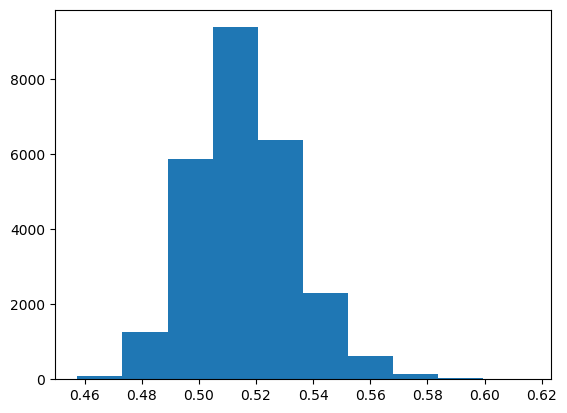

In [87]:
print("Statistical description of uncertainty values:")
print(describe(SVHN_uncertainties))
print("Histogram of uncertainty values:")
plt.hist(SVHN_uncertainties)
plt.show()

Scatterplot of softmax value of predicted output (x) and uncertainty (y):


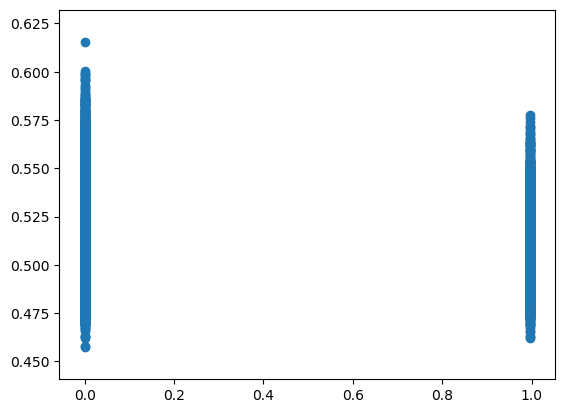

In [88]:
plt.scatter(x = SVHN_output_values_of_predicted_outputs, y = SVHN_uncertainties)
print("Scatterplot of softmax value of predicted output (x) and uncertainty (y):")
plt.show()

Variance of singular LeNet's outputs for each input
DescribeResult(nobs=26032, minmax=(0.0015416204, 0.089999996), mean=0.07014241, variance=0.00060649577, skewness=-1.0662822723388672, kurtosis=-0.23483780704990131)


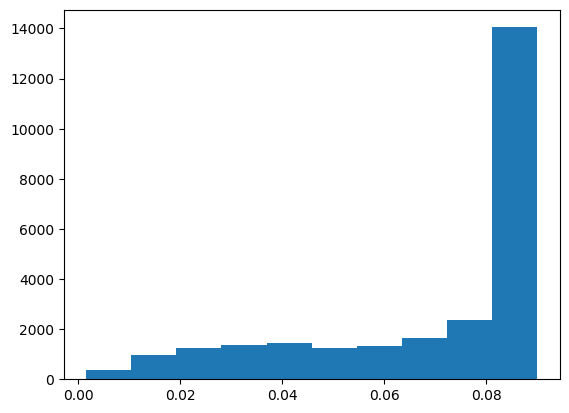

In [89]:
print("Variance of singular LeNet's outputs for each input")
print(describe(SVHN_variance))
plt.hist(SVHN_variance)
plt.show()

583
0.9776044867854947
DescribeResult(nobs=26032, minmax=(0.2, 1.0), mean=0.9387830362630609, variance=0.02016843942179762, skewness=-2.3446405913249633, kurtosis=4.631817671115236)


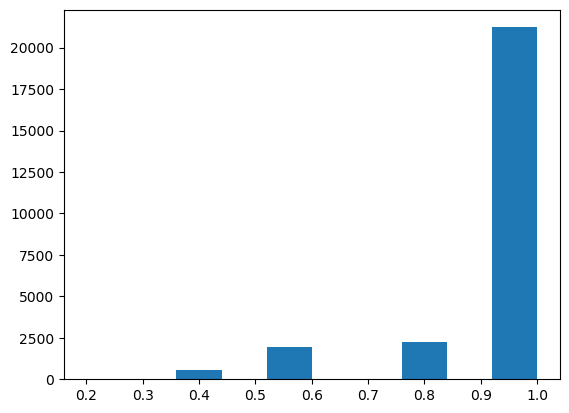

In [90]:
print(len(SVHN_different_instances_between_voting_and_averaging))
print(1 - len(SVHN_different_instances_between_voting_and_averaging)/len(SVHN_testX))
print(describe(SVHN_vote_ratios_of_predicted_outputs))
plt.hist(SVHN_vote_ratios_of_predicted_outputs)
plt.show()

## CIFAR10

Statistical description of uncertainty values:
DescribeResult(nobs=10000, minmax=(0.4749960740753367, 0.6300246874890909), mean=0.533226166914955, variance=0.00034186018369859815, skewness=0.4431453703855388, kurtosis=0.6266884883760371)
Histogram of uncertainty values:


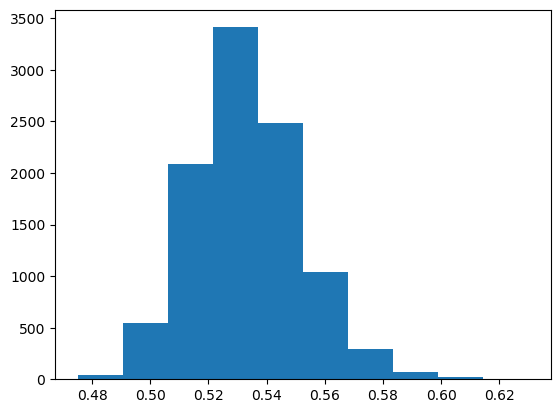

In [91]:
print("Statistical description of uncertainty values:")
print(describe(CIFAR10_uncertainties))
print("Histogram of uncertainty values:")
plt.hist(CIFAR10_uncertainties)
plt.show()

Scatterplot of softmax value of predicted output (x) and uncertainty (y):


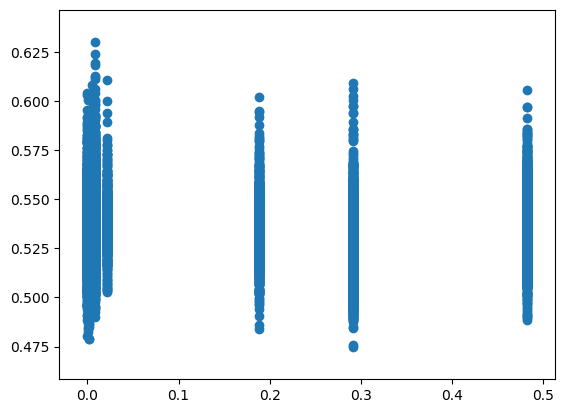

In [92]:
plt.scatter(x = CIFAR10_output_values_of_predicted_outputs, y = CIFAR10_uncertainties)
print("Scatterplot of softmax value of predicted output (x) and uncertainty (y):")
plt.show()

Variance of singular LeNet's outputs for each input
DescribeResult(nobs=10000, minmax=(0.0034279183, 0.08999999), mean=0.04669256, variance=0.0006286791, skewness=0.2868500351905823, kurtosis=-1.2031159244694924)


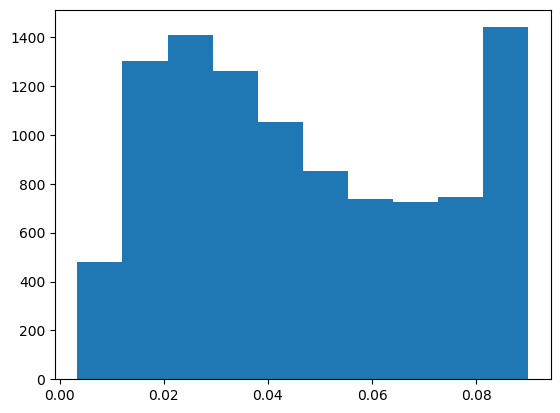

In [93]:
print("Variance of singular LeNet's outputs for each input")
print(describe(CIFAR10_variance))
plt.hist(CIFAR10_variance)
plt.show()

1251
0.8749
DescribeResult(nobs=10000, minmax=(0.2, 1.0), mean=0.69726, variance=0.045813073707370734, skewness=0.036347766126869234, kurtosis=-1.1348605030295296)


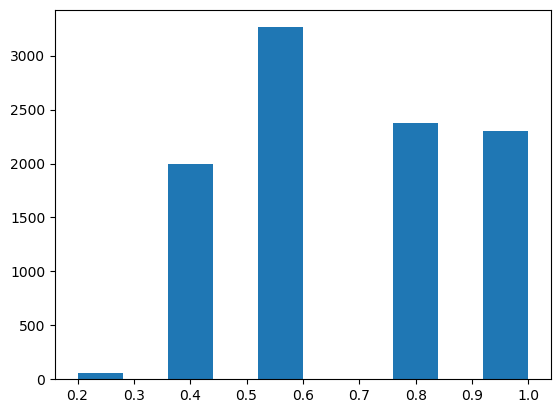

In [94]:
print(len(CIFAR10_different_instances_between_voting_and_averaging))
print(1 - len(CIFAR10_different_instances_between_voting_and_averaging)/len(CIFAR10_testX))
print(describe(CIFAR10_vote_ratios_of_predicted_outputs))
plt.hist(CIFAR10_vote_ratios_of_predicted_outputs)
plt.show()

## MNIST

Statistical description of uncertainty values:
DescribeResult(nobs=10000, minmax=(0.49887227973321535, 0.6685638174865742), mean=0.5667035535179094, variance=0.0005410533095432758, skewness=0.48301366950164665, kurtosis=0.2341547833820914)
Histogram of uncertainty values:


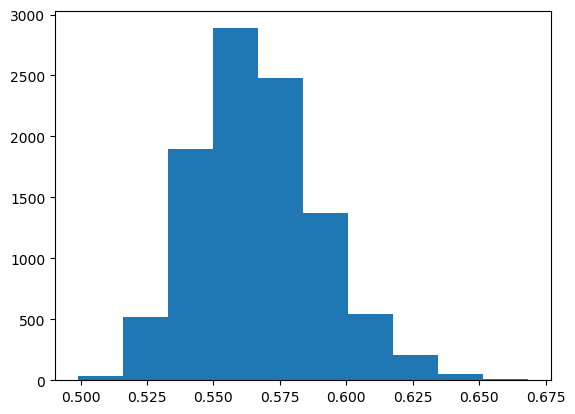

In [95]:
print("Statistical description of uncertainty values:")
print(describe(MNIST_uncertainties))
print("Histogram of uncertainty values:")
plt.hist(MNIST_uncertainties)
plt.show()

Scatterplot of softmax value of predicted output (x) and uncertainty (y):


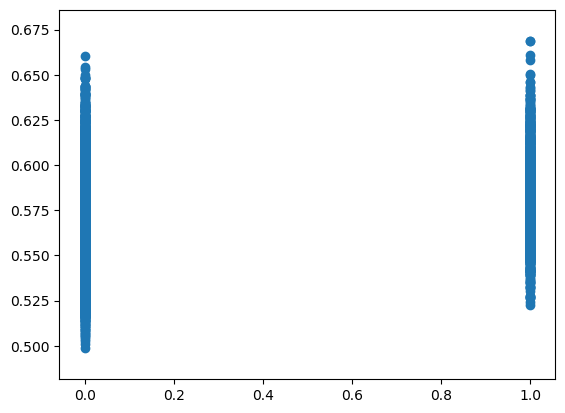

In [96]:
plt.scatter(x = MNIST_output_values_of_predicted_outputs, y = MNIST_uncertainties)
print("Scatterplot of softmax value of predicted output (x) and uncertainty (y):")
plt.show()

Variance of singular LeNet's outputs for each input
DescribeResult(nobs=10000, minmax=(0.012562935, 0.08999999), mean=0.07653584, variance=0.00036865158, skewness=-1.30161714553833, kurtosis=0.3841578567419184)


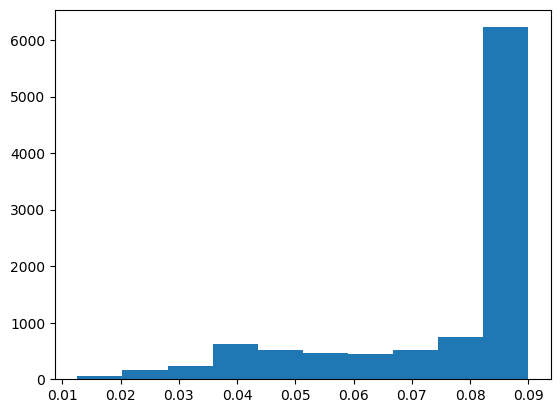

In [97]:
print("Variance of singular LeNet's outputs for each input")
print(describe(MNIST_variance))
plt.hist(MNIST_variance)
plt.show()

435
0.9565
DescribeResult(nobs=10000, minmax=(0.2, 1.0), mean=0.8490200000000001, variance=0.03759679927992799, skewness=-0.9284032480627908, kurtosis=-0.4254441435958056)


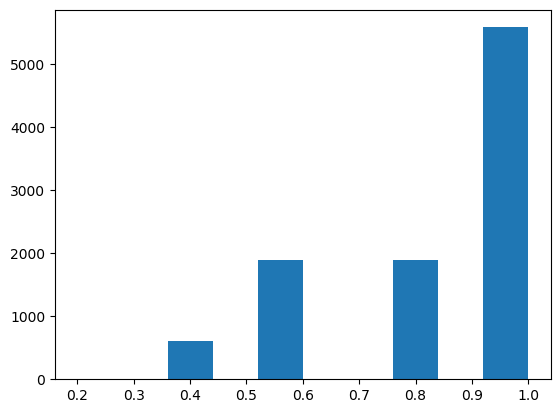

In [98]:
print(len(MNIST_different_instances_between_voting_and_averaging))
print(1 - len(MNIST_different_instances_between_voting_and_averaging)/len(MNIST_testX))
print(describe(MNIST_vote_ratios_of_predicted_outputs))
plt.hist(MNIST_vote_ratios_of_predicted_outputs)
plt.show()

## NotMNIST

Statistical description of uncertainty values:
DescribeResult(nobs=18724, minmax=(0.48874206344537924, 0.6582382647371257), mean=0.5460275980337269, variance=0.00040714651665842497, skewness=0.41501246514970275, kurtosis=0.4109408272218569)
Histogram of uncertainty values:


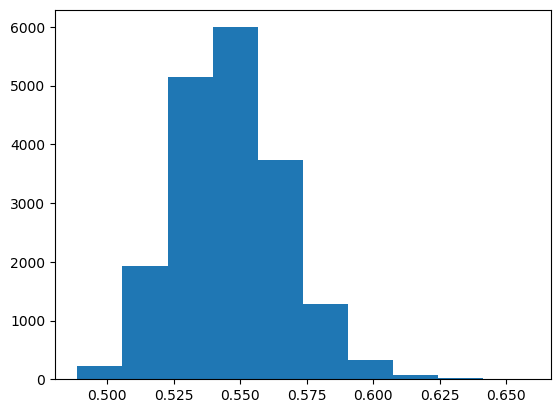

In [99]:
print("Statistical description of uncertainty values:")
print(describe(NotMNIST_uncertainties))
print("Histogram of uncertainty values:")
plt.hist(NotMNIST_uncertainties)
plt.show()

Scatterplot of softmax value of predicted output (x) and uncertainty (y):


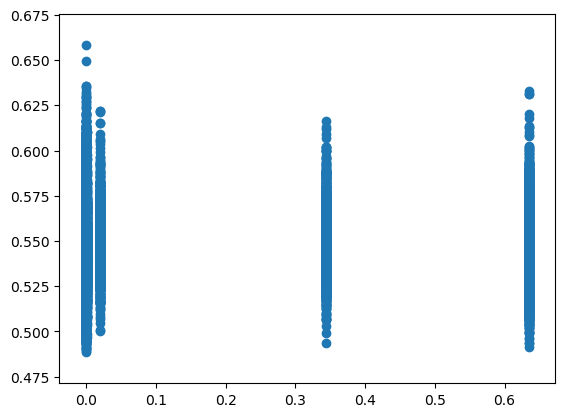

In [100]:
plt.scatter(x = NotMNIST_output_values_of_predicted_outputs, y = NotMNIST_uncertainties)
print("Scatterplot of softmax value of predicted output (x) and uncertainty (y):")
plt.show()

Variance of singular LeNet's outputs for each input
DescribeResult(nobs=18724, minmax=(0.0048684427, 0.08999999), mean=0.06906968, variance=0.00055048673, skewness=-0.7824153304100037, kurtosis=-0.792647965817288)


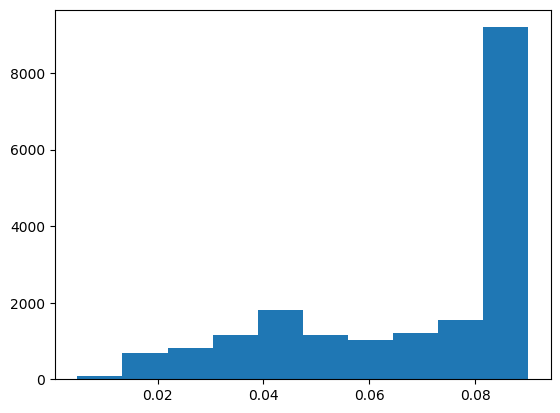

In [101]:
print("Variance of singular LeNet's outputs for each input")
print(describe(NotMNIST_variance))
plt.hist(NotMNIST_variance)
plt.show()

DescribeResult(nobs=18724, minmax=(0.2, 1.0), mean=0.7697607348857082, variance=0.04617841842078127, skewness=-0.35627199372947155, kurtosis=-1.1590270572822543)


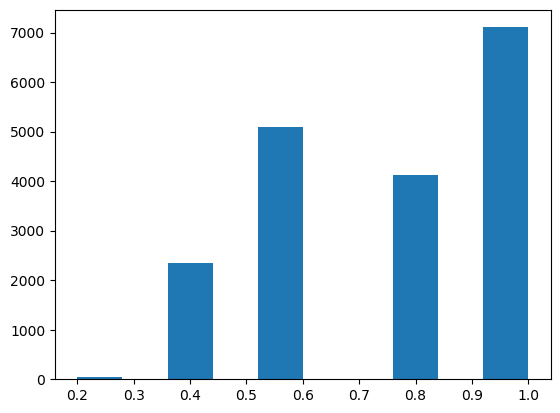

In [102]:
print(describe(NotMNIST_vote_ratios_of_predicted_outputs))
plt.hist(NotMNIST_vote_ratios_of_predicted_outputs)
plt.show()